$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $


<h3> Quantum compiler </h3>
<h4> Introduction </h4>
We're used to multiple systems, our maths works in decimals, our computers
works in binary but everything what connects those number systems is
deterministic outcome. If we write down '0.5' and flip the paper, than flip
it back, we're sure that we will see '0.5'. But what if thats not always true?

In [6]:
# Imports

from matplotlib.patches import Arc
from matplotlib.pyplot import text, gca
from quantum_compiler.drawing import draw_quantum_state, draw_qubit
from quantum_compiler.qbit import QuantumCircuit

<h4> Qbit </h4>
A qubit (or quantum bit) is the quantum mechanical analogue of a classical bit.
In classical computing the information is encoded in bits,
where each bit can have the value zero or one.
In quantum computing the information is encoded in qubits.
A qubit is a two-level quantum system where the two basis qubit states are
usually written as
$ \ket{0} = \myvector{1 \\ 0} $ and $ \ket{1} = \myvector{0\\ 1} $.
<br/>Two other states, called orthogonal x-basis states are
$ \ket{+} = \myvector{\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2}}$ and
$ \ket{-} = \myvector{\frac{\sqrt{2}}{2} \\ \frac{-\sqrt{2}}{2}}$

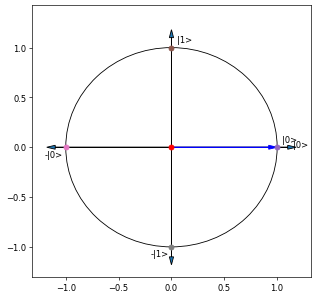

In [7]:
draw_qubit()

# Creating our first qubit
first_qubit = QuantumCircuit(1)
# Drawing it on plain
draw_quantum_state(first_qubit.matrix_representation, name='|0>')

<h4>NOT gate</h4>
First gate we will talk about is NOT gate, also called Pauli-X gate.
It transforms $ \ket{0} $ to $ \ket{1} $ and $ \ket{1} $ to $ \ket{0} $.
Looking at it from drawing on plain approach it is a rotation through pi radians
around x-axis.

Text(0.21, 0.09, 'x-gate transformation')

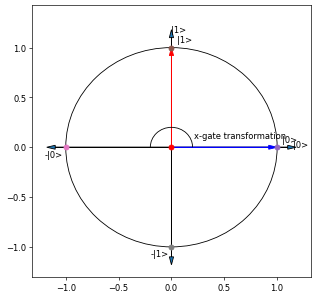

In [8]:
draw_qubit()

# Drawing |0> on plain
draw_quantum_state(first_qubit.matrix_representation, name='|0>')

# Put not gate on qubit on position 0
first_qubit.x(0)

# Drawing |1> on plain
draw_quantum_state(first_qubit.matrix_representation, name='|1>', color='red')
gca().add_patch(Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=90))
text(0.21,0.09,'x-gate')

# Put qubit back in |0> state
first_qubit.x(0)

<h4>Superposition</h4>
Qubits can be in a superposition of both the basis states 
$ \ket{0} $ and $ \ket{1} $. 
When a qubit is measured (to be more precise: only observables can be 
measured), the qubit will collapse to one of its eigenstates and the 
measured value will reflect that state. For example, when a qubit is in a 
superposition state of equal weights, a measurement will make it collapse 
to one of its two basis states $ \ket{0} $ and 
$ \ket{1} $ with an equal probability of 50%. 
$ \ket{0} $ is the state that when measured, 
and therefore collapsed, will always give the result 0. Similarly, 
$ \ket{1} $ will always convert to 1.

<h4>Perfect coinflip</h4>
An example quantum operator for quantum coin-flipping is Hadamard.
It puts our eigenstate qubit ($ \ket{1} $ or $ \ket{0} $) into 50/50 position
that can be determinated only by doing measurement. So until
we don't measure it we can't be sure what outcome will be.
As if we look at states transformations it goes this way.
<br/> $ \ket{0} $ into $ \ket{+} $ into $ \ket{0} $
<br/> $ \ket{1} $ into $ \ket{-} $ into $ \ket{1} $

In [ ]:
from collections import Counter

runs = 1000
# Prepare plain
draw_qubit()

# Draw current state (|1>)
draw_quantum_state(first_qubit.matrix_representation, name='|1>', color="red")
# Use Hadamards gate on our qubit
first_qubit.h(0)
# Watch the outcome
draw_quantum_state(first_qubit.matrix_representation, name='|->', color="black")

counter_of_states = Counter([first_qubit.measure() for _ in range(runs)])
print(f'After using h-gate and running loop {runs} times, we got those values {counter_of_states}')

<h4> But how it works in real life? </h4>
This is the most fun part. Long story short - noone knows, but first let me try to explain
what we know.
<br/> First lets take a look how laboratory setup looks like.
<img src="./images/photon1.jpg" width="40%">
<br/> So after putting in perfect beam splitter (50/50) we can expect (almost) perfect split between.
<img src="./images/photon2.jpg" width="40%">
<br/> Ok, so now we add another perfect beam splitter (50/50) and two mirrors to make it possible.
<img src="./images/photon3.jpg" width="40%">
<br/> Our logical brains can guess thats an easy one, its still 50/50, isn't it?


In [ ]:
# Lets find it out in code!
# Previously qubit was in |-> state so we use on it another h-gate, as a simulation of placing beam-splitter
first_qubit.h(0)
# ... and we measure
counter_of_states = Counter([first_qubit.measure() for _ in range(runs)])
print(f'After using h-gate and running loop {runs} times, we got those values {counter_of_states}')

<img src="./images/photon4.jpg" width="40%">
<br/> And here comes surprise! Its not that simple, but hope that your curiosity will make your way towards
great stuff that quantum computing has to offer for you!

Sources:
<br/>https://gitlab.com/qkitchen/basics-of-quantum-computing
<br/>https://quantum-inspire.com
<br/>https://en.wikipedia.org/wiki/Qubit
<br/>https://qworld.lu.lv/

Authors:
<br/>Jakub Dębski
<br/>Bazyli Polednia